In [67]:
#sklearn官方文档 http://www.scikitlearn.com.cn/
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()#绘图风格

In [100]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics

In [81]:
data = pd.read_csv('car_data.csv',encoding='gbk')
data.head(5)

,地区,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量
0,北京,8.05,86.20,95.92,37.71
1,天津,8.34,80.50,103.57,20.62
2,河北,3.39,45.60,99.03,23.32
3,山西,3.13,49.68,98.96,18.60
4,内蒙古,5.79,56.62,99.11,19.62


In [82]:
train_x = data[['人均GDP','城镇人口比重','交通工具消费价格指数','百户拥有汽车量']]
# 规范化到[0,1]空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)

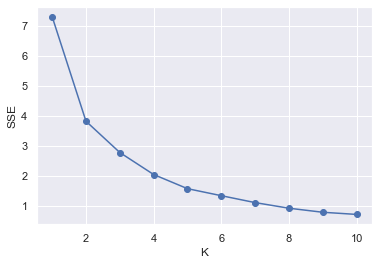

In [107]:
#K-Means 手肘法：
# 统计不同K取值的误差平方和
sse = []
for k in range(1, 11):
    # kmeans算法
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_x)
    # 计算inertia簇内误差平方和
    sse.append(kmeans.inertia_)
x = range(1, 11)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()
#确定K最佳值为4

In [108]:
from sklearn import metrics

In [109]:
# 使用kmeans进行聚类
kmeans = KMeans(n_clusters=4)
kmeans.fit(train_x)
predict_y = kmeans.predict(train_x)

In [110]:
predict_y 
#plt.scatter(train_x,predict_y,s=50)

array([1, 3, 2, 2, 1, 0, 2, 0, 3, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0])

In [111]:
data['分类结果']=predict_y
data.to_csv(r'E:\DataEngine培训\L3\L3\result.csv',encoding='gbk')

In [112]:
#使用AgglomerativeClustering进行聚类
agglomerative=sklearn.cluster.AgglomerativeClustering(n_clusters=4, affinity='euclidean', compute_full_tree='auto', linkage='ward')

In [113]:
predict_y =agglomerative.fit_predict(train_x)
predict_y 

array([1, 2, 0, 0, 1, 0, 0, 3, 2, 1, 1, 3, 0, 3, 1, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 0, 0, 3, 3, 3, 3, 3], dtype=int64)

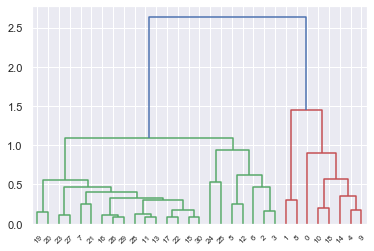

In [114]:
from scipy.cluster.hierarchy import dendrogram, ward
linkage_matrix = ward(train_x)
dendrogram(linkage_matrix)
plt.show()

In [128]:
import os
print(os.path.abspath('.'))

C:\Users\13621
